In [1]:
#MAJOR PROJECT 1


In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep = '\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

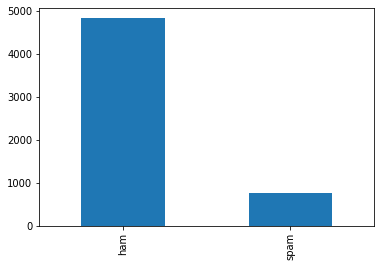

In [5]:
df['label'].value_counts().plot(kind = 'bar')

In [6]:
x = df.iloc[:,1].values 
y = df.iloc[:,0].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [8]:
#Apply TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
x_train_v = vect.fit_transform(x_train)#for training data it is vect.fit_transform
x_test_v = vect.transform(x_test)#for testing data ,it is vect.transform

In [9]:
#Apply CLASSIFIER(SVC)
from sklearn.svm import SVC
model = SVC()

In [10]:
#fitting the model
model.fit(x_train_v,y_train)

SVC()

In [11]:
#Predictor variable
y_pred = model.predict(x_test_v)
y_pred # predicted values

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [12]:
y_test # actual values

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

98.56424982053123

In [14]:
a = df['message'][10]
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [15]:
a = vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [16]:
b = df['message'][12]
b

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [17]:
b = vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [18]:
c = "win free tickets today itself"
c

'win free tickets today itself'

In [19]:
c = vect.transform([c])
model.predict(c)

array(['ham'], dtype=object)

In [20]:
from sklearn.pipeline import make_pipeline
text_model = make_pipeline(TfidfVectorizer(),SVC())
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [21]:
y_pred1 = text_model.predict(x_test)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [22]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [23]:
accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [24]:
a1 = df['message'][2]
a1

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [25]:
text_model.predict([a1])

array(['spam'], dtype=object)

In [26]:
text_model.predict(['Hi there'])

array(['ham'], dtype=object)

In [27]:
import joblib
joblib.dump(text_model,'spam-ham')

['spam-ham']